#Modules installation

In [1]:
!pip install tweepy
!pip install nltk

    100% |████████████████████████████████| 286kB 8.5MB/s 
  Running setup.py bdist_wheel for PySocks ... - done
  Stored in directory: /root/.cache/pip/wheels/22/5c/b5/12e0dfdfa85bea67b23628b6425fae715c687e947a45ee3df9
Successfully built PySocks


In [2]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#Twitter Streaming

In [4]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener


#consumer key, consumer secret, access token, access secret.
consumer_key="..."
consumer_secret="..."
access_token="..."
access_token_secret="..."

class Listener(StreamListener):
  def on_data(self, data):
    print(data)
    return(True)
  
  def on_error(self, status):
    print(status)

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

twitterStream = Stream(auth, Listener())
twitterStream.sample()


#Twitter Streaming to File

In [0]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener


#consumer key, consumer secret, access token, access secret.
consumer_key="..."
consumer_secret="..."
access_token="..."
access_token_secret="..."

class Listener(StreamListener):
  def on_data(self, data):
    with open('tweets_sample.json', 'a') as f:
      f.write(data)
      print(data)
      return(True)
      f.write('\n')
  
  def on_error(self, status):
    print(status)

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

twitterStream = Stream(auth, Listener())
#twitterStream.filter(track=['sulteng'])
twitterStream.sample()

#Data Understanding

In [5]:
file_name = 'tweets_sample.json'

with (open(file_name, 'r')) as f:
  lines = f.readlines()
  print(lines[120])

{"created_at":"Fri Oct 05 02:05:48 +0000 2018","id":1048031470323941376,"id_str":"1048031470323941376","text":"RT @MFSD_15: A m\u00ed no me matan manes tatuados y barbados. Les fall\u00e9","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2965420367,"id_str":"2965420367","name":"Valentina Casallas","screen_name":"Valecasallas11","location":"Colombia","url":null,"description":"RJ3 \u2764\ufe0f\u271d\ufe0f","translator_type":"none","protected":false,"verified":false,"followers_count":307,"friends_count":100,"listed_count":0,"favourites_count":30095,"statuses_count":4953,"created_at":"Wed Jan 07 03:25:12 +0000 2015","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":"es","contributors_enabled":false,"is_translator":false,"profil

In [0]:
import json
import matplotlib.pyplot as plt

In [7]:
file_name = 'tweets_sample.json'

tweets_data = []
with (open(file_name, 'r')) as f:
  for line in f:
    try:
      tweet = json.loads(line)
      if('delete' not in tweet.keys()):
        tweets_data.append(tweet)
    except:
      continue
      
print(len(tweets_data))

1821


In [8]:
print(tweets_data[0]['user'].keys())

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'url', 'description', 'translator_type', 'protected', 'verified', 'followers_count', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count', 'created_at', 'utc_offset', 'time_zone', 'geo_enabled', 'lang', 'contributors_enabled', 'is_translator', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'profile_image_url', 'profile_image_url_https', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications'])


In [0]:
tweet_by_lang = {}
for tweet in tweets_data:
  lang = tweet['lang']
  if(lang in tweet_by_lang):
    tweet_by_lang[lang] += 1
  else:
    tweet_by_lang[lang] = 1

In [2]:
print(tweet_by_lang)

NameError: ignored

([<matplotlib.axis.XTick at 0x7ff40fe99908>,
 <a list of 33 Text xticklabel objects>)

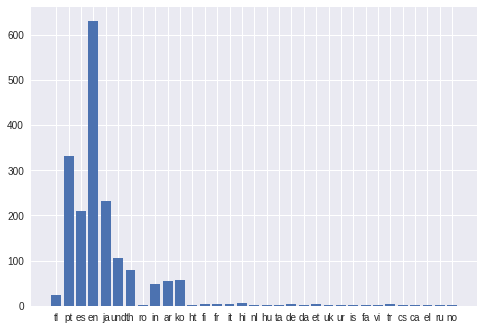

In [12]:
plt.bar(range(len(tweet_by_lang)), list(tweet_by_lang.values()), align='center')
plt.xticks(range(len(tweet_by_lang)), list(tweet_by_lang.keys()))

In [0]:
tweet_by_country = {}
for tweet in tweets_data:
  country = 'None'
  if (tweet['place'] != None) :
    country = tweet['place']['country']
  else:
    country = tweet['user']['location']
  
  if(country in tweet_by_country):
    tweet_by_country[country] += 1
  else:
    tweet_by_country[country] = 1

In [14]:
print(tweet_by_country)

{'Tarlac City, Central Luzon': 1, 'rj': 1, 'España': 1, None: 613, 'Yogyakarta': 1, 'Las Vegas, NV': 1, 'Mexico': 2, '京都': 1, 'かんさい': 1, 'Farmerville, LA': 1, 'Boynton Beach, FL': 1, 'Palm Springs, CA': 1, 'Paradise City': 1, 'California, USA': 3, 'East Coast': 1, 'Lima': 1, 'الرياض, المملكة العربية السعودية': 2, 'I Am My Own Nation': 1, 'Dublin, OH': 1, 'BTS': 1, 'New York, NY': 4, 'Cabo Frio ': 1, 'Ottawa, Ontario': 2, 'そこ': 1, '福岡県': 2, 'ʀᴏʟᴇᴘʟᴀʏᴇʀ ᴘᴜʀᴘᴏꜱᴇꜱ ᴏɴʟʏ.': 1, 'Suka segala tentang Thailand': 1, 'United States': 30, 'Al Khobar, Kingdom of Saudi Arabia': 1, 'Colombia': 1, 'La Dorada, Colombia': 1, 'Baton Rouge, LA': 2, 'Santa Rosa, Canelones ': 1, 'Capela Nova': 1, 'Thanking God for POTUS Trump!': 1, 'Bahia, Brasil': 2, 'جدة ': 1, 'Bom Jesus do Itabapoana, Brasi': 1, 'West Palm Beach, FL': 1, 'From Parts Unkown': 1, 'july 3rd, 2011.': 1, 'Kashmir to Kanyakumari': 1, '27/09/18 me siguió shawn': 1, 'johnyong lumark jaedo minno 💚': 1, 'NYC': 2, 'ちょいと田舎': 1, 'New Zealand': 2, 'ske

In [0]:
plt.bar(range(len(tweet_by_country)), list(tweet_by_country.values()), align='center')
plt.xticks(range(len(tweet_by_country)), list(tweet_by_country.keys()))

#Sentiment Analyzer

In [16]:
import json
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [17]:
file_name = 'tweets_sample.json'
sid = SentimentIntensityAnalyzer()

tweets_text_sentiment = {}
with (open(file_name, 'r')) as f:
  for line in f:
    try:
      tweet = json.loads(line)
      if('delete' not in tweet.keys()):
        if(tweet['lang'] == 'en'):
          text = tweet['text']
          print(text + " : " + str(sid.polarity_scores(text)['compound']))
#          ss = sid.polarity_scores(text)
#          for k in sorted(ss):
#            print('{0}: {1}, '.format(k, ss[k]), end='')
#          print()
    except:
      continue

RT @halsey: Without Me is out now. Here are my insides. Handle them with care. https://t.co/MG2LgYJgsN https://t.co/41aiOtt0td : 0.4939
I really took a nap : 0.0
Check out what I just added to my closet on Poshmark: L.e.i Chelsea Women’s Juniors Jeans Size 17 XL NWT.… https://t.co/17NeAoOCRv : 0.0
RT @cspan: Retired #SCOTUS Justice John Paul Stevens on Judge #Kavanaugh: “I’ve changed my views for reasons that have no really relationsh… : 0.296
RT @TheDweck: Op-ed: I’m Sorry, Babe, It’ll Never Happen Again. Here, I Got You Flowers and Those Earrings You Wanted : -0.0772
“and when we speak we are afraid
our words will not be heard
nor welcomed
but when we are silent
we are still afrai… https://t.co/85AbpC7EXU : -0.1326
RT @NationalAutism: He is nonverbal. #NewYork friends, please share!

#autismmissing https://t.co/dGtlGzGrte : 0.784
RT @GetOnSwag: @BTS_twt Night Market Frida Kahlo collection LOVER t-shirt 
GENTLE MONSTER x ALEXANDER WANG sunglasses
JIMIN #JIMIN  181004… : 0.8468
RT @Mor

#Bring it all together

In [18]:
import json
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#consumer key, consumer secret, access token, access secret.
consumer_key="..."
consumer_secret="..."
access_token="..."
access_token_secret="..."

sid = SentimentIntensityAnalyzer()

class Listener(StreamListener):
  def on_data(self, data):
      tweet = json.loads(data)
      if('delete' not in tweet.keys()):
        if(tweet['lang'] == 'en'):
          text = tweet['text']

          sentiment_score = sid.polarity_scores(text)['compound']
          if(sentiment_score < 0):
            sentiment = 'NEGATIVE'
          elif(sentiment_score > 0):
            sentiment = 'POSITIVE'
          else:
            sentiment = 'NEUTRAL'

          print(sentiment + " : " + text)
          print('===============================================================')
      return(True)
  
  def on_error(self, status):
    print(status)

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

twitterStream = Stream(auth, Listener())
twitterStream.sample()

NEUTRAL : @ULTIMATERPE Would you be my son ?
NEUTRAL : RT @zeeresir: I need Kidzania for Adults. I mean, I still can’t decide on my career. Bring that Adultzania ons.
NEUTRAL : RT @Elekt_: When I come around https://t.co/BjSBQf7suA
NEUTRAL : RT @Genexix__: So Netflix just did something 👀 https://t.co/BQPIODKU6T
POSITIVE : RT @choi_bts2: The Christmas 🎄 song Taehyung made before. He tried to Song with Jimin but the PD said it should be more harmonious with the…
POSITIVE : @FortniteGame Don't forget your umbrella 
Why wasn't the tomato skin a item shop skin.
POSITIVE : @FootpatrolHelp I was ordering 3 different sneakers and got hit with a bunch of different error codes please dm me. Thank you.
NEUTRAL : Charlie two kings ooooo
NEUTRAL : RT @mxdern_ecstasy: venom vs a star is born https://t.co/hrHZuW238g
NEUTRAL : @Poplak 😂😂😂😂😂Death by Rama-Hugger
POSITIVE : RT @StayfanyTH: "Teach You" Beauty Breakdown - Ep 4 https://t.co/fiv8qFX5Be via @YouTube
POSITIVE : @WCrypta No problem! And im real

KeyboardInterrupt: ignored

##Python module

In [0]:
import json
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#consumer key, consumer secret, access token, access secret.
consumer_key="..."
consumer_secret="..."
access_token="..."
access_token_secret="..."

sid = SentimentIntensityAnalyzer()

class Listener(StreamListener):
  def on_data(self, data):
      tweet = json.loads(data)
      if('delete' not in tweet.keys()):
        if(tweet['lang'] == 'en'):
          text = tweet['text']

          sentiment_score = sid.polarity_scores(text)['compound']
          if(sentiment_score < 0):
            sentiment = 'NEGATIVE'
          elif(sentiment_score > 0):
            sentiment = 'POSITIVE'
          else:
            sentiment = 'NEUTRAL'

          print(sentiment + " : " + text)
          print('===============================================================')
      return(True)
  
  def on_error(self, status):
    print(status)

def main():
  auth = OAuthHandler(consumer_key, consumer_secret)
  auth.set_access_token(access_token, access_token_secret)

  twitterStream = Stream(auth, Listener())
  twitterStream.sample()
  
if __name__ == "__main__":
  main()